In [1]:
import numpy as np
from scipy.special import comb


class Reaction: # 封装的类，代表每一个化学反应
    def __init__(self, rate=0., num_lefts=None, num_rights=None):
        self.rate = rate # 反应速率
        assert len(num_lefts) == len(num_rights)
        self.num_lefts = np.array(num_lefts) # 反应前各个反应物的数目
        self.num_rights = np.array(num_rights) # 反应后各个反应物的数目
        self.num_diff = self.num_rights - self.num_lefts # 改变数
    def combine(self, n, s): # 算组合数
        return np.prod(comb(n, s))
    def propensity(self, n): # 算反应倾向函数
        return self.rate * self.combine(n, self.num_lefts)


class System: # 封装的类，代表多个化学反应构成的系统
    def __init__(self, num_elements):
        assert num_elements > 0
        self.num_elements = num_elements # 系统内的反应物的类别数
        self.reactions = [] # 反应集合
    def add_reaction(self, rate=0., num_lefts=None, num_rights=None):
        assert len(num_lefts) == self.num_elements
        assert len(num_rights) == self.num_elements
        self.reactions.append(Reaction(rate, num_lefts, num_rights))
    def evolute(self, steps, inits=None): # 模拟演化
        self.t = [0] # 时间轨迹，t[0]是初始时间
        if inits is None:
            self.n = [np.ones(self.num_elements)]
        else:
            self.n = [np.array(inits)] # 反应物数目，n[0]是初始数目
        for i in range(steps):
            A = np.array([rec.propensity(self.n[-1])
                          for rec in self.reactions]) # 算每个反应的倾向函数
            A0 = A.sum()
            A /= A0 # 归一化得到概率分布
            t0 = -np.log(np.random.random())/A0 # 按概率选择下一个反应发生的间隔
            self.t.append(self.t[-1] + t0)
            d = np.random.choice(self.reactions, p=A) # 按概率选择其中一个反应发生
            self.n.append(self.n[-1] + d.num_diff)

In [6]:
num_elements = 2
system = System(num_elements)

system.add_reaction(20, [0, 0], [1, 0])
system.add_reaction(2.5, [1, 0], [1, 1])
system.add_reaction(1, [1, 0], [0, 0])
system.add_reaction(1, [0, 1], [0, 0])

system.evolute(100000)

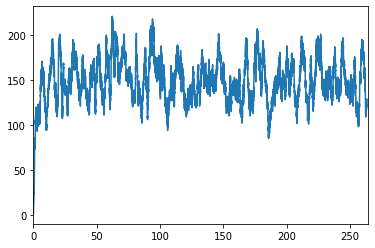

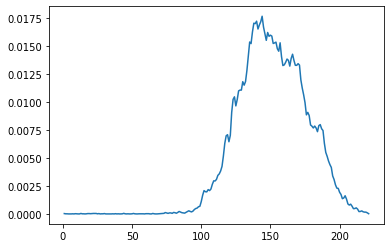

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

x = system.t
y = [i[1] for i in system.n]

plt.clf()
plt.plot(x, y) # 蛋白质的轨线图
plt.xlim(0, x[-1]+1)
plt.show()

d = pd.Series([i[1] for i in system.n]).value_counts()
d = d.sort_index()
d /= d.sum()
plt.clf()
plt.plot(d.index, d) # 蛋白质的（经验）分布图
plt.show()

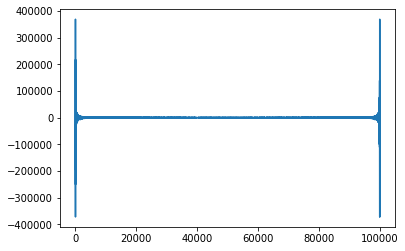

In [8]:
plt.plot(np.fft.fft(y)[1:])

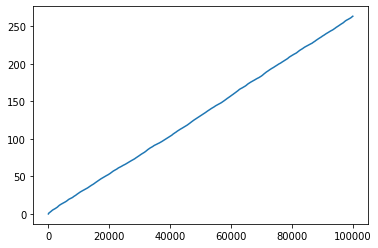

In [9]:
plt.plot(x)